## Case study of using BF file

This notebook utilizes Case_rgb.py Case_spectral.py and Case_WhereAreWeLooking.py files under the same folder.  
However, this notebook could be one step further showing more cases using the same approach.

In [3]:
from my_module import np, plt, Basemap, Polygon, toimage
import my_module.data.basic_fusion as bf
from my_module.plot import enhance_rgb

__Define__ a function showing the observing area of MODIS, MISR, and ASTER, based on the lats/lons for four corners of a block/granule.

In [2]:
def draw_screen_poly( lats, lons, m, facecolor ):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( xy, facecolor=facecolor, alpha=0.4 )
    plt.gca().add_patch(poly)

### Case 1. Iceland volcano eruption in May 3rd, 2010  
Here we show 4 MODIS granules, 4 MISR blocks but the eruption is in the 2nd MODIS granule and 3rd MISR block. We will zoom in in the following to see the details.

In [3]:
bf_file = '/u/sciteam/smzyz/scratch/data/BasicFusion/TERRA_BF_L1B_O55180_20100503123308_F000_V001.h5'

granule_MOPITT = 'granule_20100503'
granule_ASTER = 'granule_05032010130341'
block_MISR_0 = 36
block_MISR_1 = 37
block_MISR_2 = 38
block_MISR_3 = 39
granule_MODIS_1 = 'granule_2010123_1255'
granule_MODIS_2 = 'granule_2010123_1300'
granule_MODIS_3 = 'granule_2010123_1305'
granule_MODIS_4 = 'granule_2010123_1310'

/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/mnt/bwpy/single/usr/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold

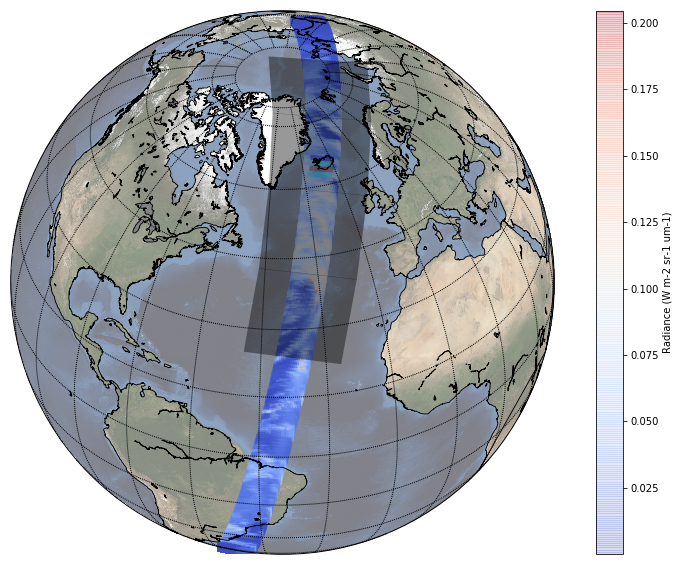

In [4]:
rad, lat, lon = bf.get_rad_latlon(bf_file, 'MOPITT', granule_MOPITT)
rad_avg = rad[:, :, :, 5].ravel()
lat_flat = lat.ravel()
lon_flat = lon.ravel()
idx_valid = np.where(rad_avg > 0)[0]
rad_valid = rad_avg[idx_valid]
lat_valid = lat_flat[idx_valid]
lon_valid = lon_flat[idx_valid]

plt.figure(figsize=(15, 10))
m = Basemap(projection='ortho',lon_0=-40,lat_0=40,resolution='l')
m.drawcoastlines(color='k', linewidth=0.9)
m.drawmeridians(np.arange(-180.,181,15.))
m.drawparallels(np.arange(90.,-81,-15.))
m.bluemarble(alpha=0.5)
im = m.scatter(lon_valid[:],lat_valid[:],c=rad_valid[:],latlon=True,marker='s',s=55, 
                cmap='coolwarm', alpha=0.2)
plt.colorbar(im, orientation='vertical', label='Radiance (W m-2 sr-1 um-1)')


lats, lons = bf.get_bounding_latlon(bf_file, 'ASTER', granule_ASTER)
draw_screen_poly( lats, lons, m, 'red' )

lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_0)
draw_screen_poly( lats, lons, m, 'blue' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_1)
draw_screen_poly( lats, lons, m, 'cyan' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_2)
draw_screen_poly( lats, lons, m, 'brown' )
lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_3)
draw_screen_poly( lats, lons, m, 'cyan' ) 

lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_1)
draw_screen_poly( lats, lons, m, 'black' )
lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_2)
draw_screen_poly( lats, lons, m, 'black' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_3)
draw_screen_poly( lats, lons, m, 'black' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_4)
draw_screen_poly( lats, lons, m, 'black' ) 

plt.show()

### RGB images  
In the following, RGB images are shown for ASTER, MISR, and MODIS.  
Enlarged radiances is shown for MOPITT using a scatter plot.

In [5]:
granule_ASTER = 'granule_05032010130341'
granule_MODIS = 'granule_2010123_1300'
block_MISR = [38]
camera_MISR = 'AN'
granule_MOPITT = 'granule_20100503'
band_MOPITT = 5


__ASTER__

>> Retrieving ASTER RGB, granule: granule_05032010130341.


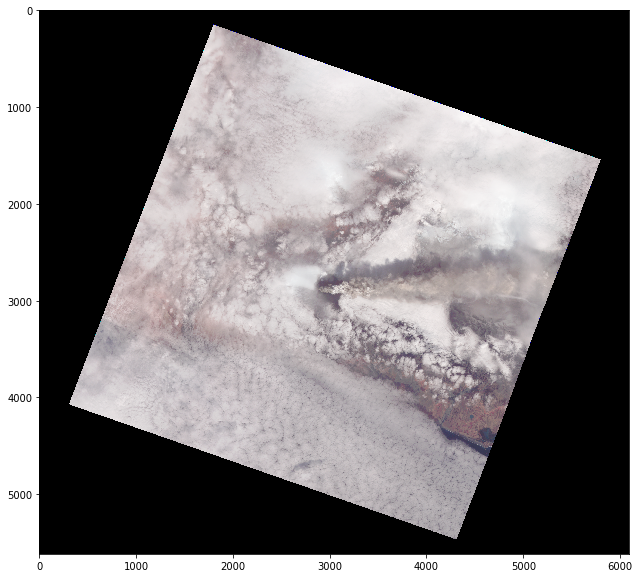

In [6]:
ASTER_rgb = bf.get_rgb(bf_file, 'ASTER', granule_ASTER)
ASTER_enhanced_rgb = enhance_rgb(ASTER_rgb)

plt.figure(figsize=(15, 10))
plt.imshow(ASTER_enhanced_rgb)
plt.show()
# toimage(ASTER_enhanced_rgb).save('ASTER_rgb.png')

__MISR__

>> Retrieving MISR RGB, camera: AN, block: [38].
(512, 2048)


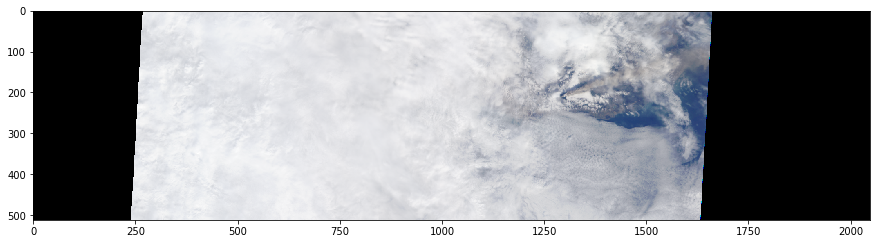

In [7]:
MISR_rgb = bf.get_rgb(bf_file, 'MISR', block_MISR, camera=camera_MISR)
MISR_enhanced_rgb = enhance_rgb(MISR_rgb)

plt.figure(figsize=(15, 10))
plt.imshow(MISR_enhanced_rgb)
plt.show()

__MODIS__

>> Retrieving USER-DEFINED MODIS RGB, granule: granule_2010123_1300.
>> Red: band 1, Green: band 4, Blue: band 3


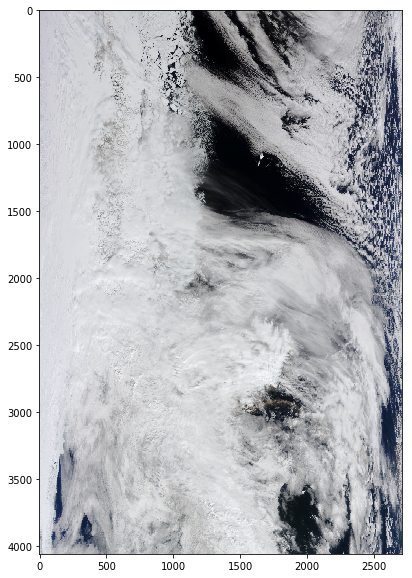

In [8]:
MODIS_rgb = bf.get_rgb(bf_file, 'MODIS', granule_MODIS, customize_rgb_bands=[1, 4, 3])
MODIS_enhanced_rgb = enhance_rgb(MODIS_rgb)

plt.figure(figsize=(15, 10))
plt.imshow(MODIS_enhanced_rgb)
plt.show()

>> Retrieving USER-DEFINED MODIS RGB, granule: granule_2010123_1300.
>> Red: band 2, Green: band 22, Blue: band 31


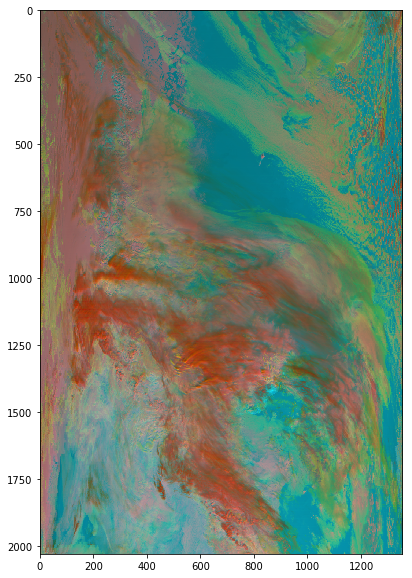

In [9]:
MODIS_rgb = bf.get_rgb(bf_file, 'MODIS', granule_MODIS, customize_rgb_bands=[2, 22, 31])
MODIS_enhanced_rgb = enhance_rgb(MODIS_rgb, scale_method='RLT', scale_factors=[1, 2.5, 1])

plt.figure(figsize=(15, 10))
plt.imshow(MODIS_enhanced_rgb)
plt.show()

__MOPITT__

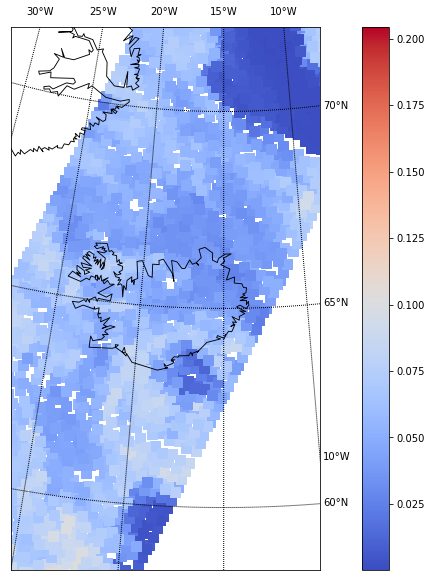

In [10]:
rad, lat, lon = bf.get_rad_latlon(bf_file, 'MOPITT', granule_MOPITT)
rad_avg = rad[:, :, :, band_MOPITT].ravel()
lat_flat = lat.ravel()
lon_flat = lon.ravel()
idx_valid = np.where(rad_avg > 0)[0]
rad_valid = rad_avg[idx_valid]
lat_valid = lat_flat[idx_valid]
lon_valid = lon_flat[idx_valid]

plt.figure(figsize=(15, 10))
m = Basemap(projection='stere',lon_0=-15,lat_0=80.,lat_ts=30,\
            llcrnrlat=58,urcrnrlat=72,\
            llcrnrlon=-25,urcrnrlon=-7,\
            rsphere=6371200.,resolution='l',area_thresh=10000)
m.drawcoastlines(color='k', linewidth=0.9)
m.drawmeridians(np.arange(-180.,181,5.), labels=[False,True,True,False])
m.drawparallels(np.arange(90.,-81,-5.), labels=[False,True,True,False])
# m.bluemarble(alpha=0.2)
im = m.scatter(lon_valid[:],lat_valid[:],c=rad_valid[:],latlon=True,marker='s',s=100, 
                cmap='coolwarm', alpha=1.0)
plt.colorbar(im, orientation='vertical')
plt.show()

### Case 2. Amazon biomass burning on August 19th, 2000  
Since I fogot the orbit information, I will first retrieve those information using bf.bf_info function.

In [15]:
bf_file = '/u/sciteam/smzyz/scratch/data/BasicFusion/TERRA_BF_L1B_O3571_20000819133750_F000_V001.h5'

bf.bf_info(bf_file, 'ASTER')


/ASTER/granule_08192000140425
   /ASTER/granule_08192000140425/Geolocation
     /ASTER/granule_08192000140425/Geolocation/Latitude (11, 11)
     /ASTER/granule_08192000140425/Geolocation/Longitude (11, 11)
   /ASTER/granule_08192000140425/PointingAngle
     /ASTER/granule_08192000140425/PointingAngle/SWIR (1,)
     /ASTER/granule_08192000140425/PointingAngle/TIR (1,)
     /ASTER/granule_08192000140425/PointingAngle/VNIR (1,)
   /ASTER/granule_08192000140425/SWIR
     /ASTER/granule_08192000140425/SWIR/Geolocation
       /ASTER/granule_08192000140425/SWIR/Geolocation/Latitude (3163, 3253)
       /ASTER/granule_08192000140425/SWIR/Geolocation/Longitude (3163, 3253)
     /ASTER/granule_08192000140425/SWIR/ImageData4 (3163, 3253)
     /ASTER/granule_08192000140425/SWIR/ImageData5 (3163, 3253)
     /ASTER/granule_08192000140425/SWIR/ImageData6 (3163, 3253)
     /ASTER/granule_08192000140425/SWIR/ImageData7 (3163, 3253)
     /ASTER/granule_08192000140425/SWIR/ImageData8 (3163, 3253)
     /A

     /ASTER/granule_08192000140500/Solar_Geometry/SolarElevation (1,)
   /ASTER/granule_08192000140500/TIR
     /ASTER/granule_08192000140500/TIR/Geolocation
       /ASTER/granule_08192000140500/TIR/Geolocation/Latitude (1024, 1071)
       /ASTER/granule_08192000140500/TIR/Geolocation/Longitude (1024, 1071)
     /ASTER/granule_08192000140500/TIR/ImageData10 (1024, 1071)
     /ASTER/granule_08192000140500/TIR/ImageData11 (1024, 1071)
     /ASTER/granule_08192000140500/TIR/ImageData12 (1024, 1071)
     /ASTER/granule_08192000140500/TIR/ImageData13 (1024, 1071)
     /ASTER/granule_08192000140500/TIR/ImageData14 (1024, 1071)
   /ASTER/granule_08192000140500/VNIR
     /ASTER/granule_08192000140500/VNIR/Geolocation
       /ASTER/granule_08192000140500/VNIR/Geolocation/Latitude (6139, 6421)
       /ASTER/granule_08192000140500/VNIR/Geolocation/Longitude (6139, 6421)
     /ASTER/granule_08192000140500/VNIR/ImageData1 (6139, 6421)
     /ASTER/granule_08192000140500/VNIR/ImageData2 (6139, 6421)


     /ASTER/granule_08192000140544/TIR/Geolocation
       /ASTER/granule_08192000140544/TIR/Geolocation/Latitude (984, 1048)
       /ASTER/granule_08192000140544/TIR/Geolocation/Longitude (984, 1048)
     /ASTER/granule_08192000140544/TIR/ImageData10 (984, 1048)
     /ASTER/granule_08192000140544/TIR/ImageData11 (984, 1048)
     /ASTER/granule_08192000140544/TIR/ImageData12 (984, 1048)
     /ASTER/granule_08192000140544/TIR/ImageData13 (984, 1048)
     /ASTER/granule_08192000140544/TIR/ImageData14 (984, 1048)
   /ASTER/granule_08192000140544/VNIR
     /ASTER/granule_08192000140544/VNIR/Geolocation
       /ASTER/granule_08192000140544/VNIR/Geolocation/Latitude (5899, 6283)
       /ASTER/granule_08192000140544/VNIR/Geolocation/Longitude (5899, 6283)
     /ASTER/granule_08192000140544/VNIR/ImageData1 (5899, 6283)
     /ASTER/granule_08192000140544/VNIR/ImageData2 (5899, 6283)
     /ASTER/granule_08192000140544/VNIR/ImageData3N (5899, 6283)

/ASTER/granule_08192000140553
   /ASTER/granule_

   /ASTER/granule_08192000142400/VNIR
     /ASTER/granule_08192000142400/VNIR/Geolocation
       /ASTER/granule_08192000142400/VNIR/Geolocation/Latitude (4903, 5557)
       /ASTER/granule_08192000142400/VNIR/Geolocation/Longitude (4903, 5557)
     /ASTER/granule_08192000142400/VNIR/ImageData1 (4903, 5557)
     /ASTER/granule_08192000142400/VNIR/ImageData2 (4903, 5557)
     /ASTER/granule_08192000142400/VNIR/ImageData3N (4903, 5557)

/ASTER/granule_08192000142409
   /ASTER/granule_08192000142409/Geolocation
     /ASTER/granule_08192000142409/Geolocation/Latitude (11, 11)
     /ASTER/granule_08192000142409/Geolocation/Longitude (11, 11)
   /ASTER/granule_08192000142409/PointingAngle
     /ASTER/granule_08192000142409/PointingAngle/SWIR (1,)
     /ASTER/granule_08192000142409/PointingAngle/TIR (1,)
     /ASTER/granule_08192000142409/PointingAngle/VNIR (1,)
   /ASTER/granule_08192000142409/SWIR
     /ASTER/granule_08192000142409/SWIR/Geolocation
       /ASTER/granule_08192000142409/SWIR/Ge

     /ASTER/granule_08192000142453/Geolocation/Longitude (11, 11)
   /ASTER/granule_08192000142453/PointingAngle
     /ASTER/granule_08192000142453/PointingAngle/SWIR (1,)
     /ASTER/granule_08192000142453/PointingAngle/TIR (1,)
     /ASTER/granule_08192000142453/PointingAngle/VNIR (1,)
   /ASTER/granule_08192000142453/SWIR
     /ASTER/granule_08192000142453/SWIR/Geolocation
       /ASTER/granule_08192000142453/SWIR/Geolocation/Latitude (2446, 2776)
       /ASTER/granule_08192000142453/SWIR/Geolocation/Longitude (2446, 2776)
     /ASTER/granule_08192000142453/SWIR/ImageData4 (2446, 2776)
     /ASTER/granule_08192000142453/SWIR/ImageData5 (2446, 2776)
     /ASTER/granule_08192000142453/SWIR/ImageData6 (2446, 2776)
     /ASTER/granule_08192000142453/SWIR/ImageData7 (2446, 2776)
     /ASTER/granule_08192000142453/SWIR/ImageData8 (2446, 2776)
     /ASTER/granule_08192000142453/SWIR/ImageData9 (2446, 2776)
   /ASTER/granule_08192000142453/Solar_Geometry
     /ASTER/granule_08192000142453/S

     /ASTER/granule_08192000142537/SWIR/ImageData5 (2437, 2767)
     /ASTER/granule_08192000142537/SWIR/ImageData6 (2437, 2767)
     /ASTER/granule_08192000142537/SWIR/ImageData7 (2437, 2767)
     /ASTER/granule_08192000142537/SWIR/ImageData8 (2437, 2767)
     /ASTER/granule_08192000142537/SWIR/ImageData9 (2437, 2767)
   /ASTER/granule_08192000142537/Solar_Geometry
     /ASTER/granule_08192000142537/Solar_Geometry/SolarAzimuth (1,)
     /ASTER/granule_08192000142537/Solar_Geometry/SolarElevation (1,)
   /ASTER/granule_08192000142537/TIR
     /ASTER/granule_08192000142537/TIR/Geolocation
       /ASTER/granule_08192000142537/TIR/Geolocation/Latitude (813, 923)
       /ASTER/granule_08192000142537/TIR/Geolocation/Longitude (813, 923)
     /ASTER/granule_08192000142537/TIR/ImageData10 (813, 923)
     /ASTER/granule_08192000142537/TIR/ImageData11 (813, 923)
     /ASTER/granule_08192000142537/TIR/ImageData12 (813, 923)
     /ASTER/granule_08192000142537/TIR/ImageData13 (813, 923)
     /ASTER

   /ASTER/granule_08192000142622/TIR
     /ASTER/granule_08192000142622/TIR/Geolocation
       /ASTER/granule_08192000142622/TIR/Geolocation/Latitude (813, 924)
       /ASTER/granule_08192000142622/TIR/Geolocation/Longitude (813, 924)
     /ASTER/granule_08192000142622/TIR/ImageData10 (813, 924)
     /ASTER/granule_08192000142622/TIR/ImageData11 (813, 924)
     /ASTER/granule_08192000142622/TIR/ImageData12 (813, 924)
     /ASTER/granule_08192000142622/TIR/ImageData13 (813, 924)
     /ASTER/granule_08192000142622/TIR/ImageData14 (813, 924)
   /ASTER/granule_08192000142622/VNIR
     /ASTER/granule_08192000142622/VNIR/Geolocation
       /ASTER/granule_08192000142622/VNIR/Geolocation/Latitude (4873, 5539)
       /ASTER/granule_08192000142622/VNIR/Geolocation/Longitude (4873, 5539)
     /ASTER/granule_08192000142622/VNIR/ImageData1 (4873, 5539)
     /ASTER/granule_08192000142622/VNIR/ImageData2 (4873, 5539)
     /ASTER/granule_08192000142622/VNIR/ImageData3N (4873, 5539)

/ASTER/granule_081

       /ASTER/granule_08192000142706/VNIR/Geolocation/Latitude (4879, 5539)
       /ASTER/granule_08192000142706/VNIR/Geolocation/Longitude (4879, 5539)
     /ASTER/granule_08192000142706/VNIR/ImageData1 (4879, 5539)
     /ASTER/granule_08192000142706/VNIR/ImageData2 (4879, 5539)
     /ASTER/granule_08192000142706/VNIR/ImageData3N (4879, 5539)

/ASTER/granule_08192000142715
   /ASTER/granule_08192000142715/Geolocation
     /ASTER/granule_08192000142715/Geolocation/Latitude (11, 11)
     /ASTER/granule_08192000142715/Geolocation/Longitude (11, 11)
   /ASTER/granule_08192000142715/PointingAngle
     /ASTER/granule_08192000142715/PointingAngle/SWIR (1,)
     /ASTER/granule_08192000142715/PointingAngle/TIR (1,)
     /ASTER/granule_08192000142715/PointingAngle/VNIR (1,)
   /ASTER/granule_08192000142715/SWIR
     /ASTER/granule_08192000142715/SWIR/Geolocation
       /ASTER/granule_08192000142715/SWIR/Geolocation/Latitude (2440, 2770)
       /ASTER/granule_08192000142715/SWIR/Geolocation/Long

     /ASTER/granule_08192000142759/PointingAngle/SWIR (1,)
     /ASTER/granule_08192000142759/PointingAngle/TIR (1,)
     /ASTER/granule_08192000142759/PointingAngle/VNIR (1,)
   /ASTER/granule_08192000142759/SWIR
     /ASTER/granule_08192000142759/SWIR/Geolocation
       /ASTER/granule_08192000142759/SWIR/Geolocation/Latitude (2440, 2770)
       /ASTER/granule_08192000142759/SWIR/Geolocation/Longitude (2440, 2770)
     /ASTER/granule_08192000142759/SWIR/ImageData4 (2440, 2770)
     /ASTER/granule_08192000142759/SWIR/ImageData5 (2440, 2770)
     /ASTER/granule_08192000142759/SWIR/ImageData6 (2440, 2770)
     /ASTER/granule_08192000142759/SWIR/ImageData7 (2440, 2770)
     /ASTER/granule_08192000142759/SWIR/ImageData8 (2440, 2770)
     /ASTER/granule_08192000142759/SWIR/ImageData9 (2440, 2770)
   /ASTER/granule_08192000142759/Solar_Geometry
     /ASTER/granule_08192000142759/Solar_Geometry/SolarAzimuth (1,)
     /ASTER/granule_08192000142759/Solar_Geometry/SolarElevation (1,)
   /ASTER/g

     /ASTER/granule_08192000142843/SWIR/ImageData6 (2440, 2770)
     /ASTER/granule_08192000142843/SWIR/ImageData7 (2440, 2770)
     /ASTER/granule_08192000142843/SWIR/ImageData8 (2440, 2770)
     /ASTER/granule_08192000142843/SWIR/ImageData9 (2440, 2770)
   /ASTER/granule_08192000142843/Solar_Geometry
     /ASTER/granule_08192000142843/Solar_Geometry/SolarAzimuth (1,)
     /ASTER/granule_08192000142843/Solar_Geometry/SolarElevation (1,)
   /ASTER/granule_08192000142843/TIR
     /ASTER/granule_08192000142843/TIR/Geolocation
       /ASTER/granule_08192000142843/TIR/Geolocation/Latitude (814, 924)
       /ASTER/granule_08192000142843/TIR/Geolocation/Longitude (814, 924)
     /ASTER/granule_08192000142843/TIR/ImageData10 (814, 924)
     /ASTER/granule_08192000142843/TIR/ImageData11 (814, 924)
     /ASTER/granule_08192000142843/TIR/ImageData12 (814, 924)
     /ASTER/granule_08192000142843/TIR/ImageData13 (814, 924)
     /ASTER/granule_08192000142843/TIR/ImageData14 (814, 924)
   /ASTER/gra

       /ASTER/granule_08192000142928/TIR/Geolocation/Latitude (813, 923)
       /ASTER/granule_08192000142928/TIR/Geolocation/Longitude (813, 923)
     /ASTER/granule_08192000142928/TIR/ImageData10 (813, 923)
     /ASTER/granule_08192000142928/TIR/ImageData11 (813, 923)
     /ASTER/granule_08192000142928/TIR/ImageData12 (813, 923)
     /ASTER/granule_08192000142928/TIR/ImageData13 (813, 923)
     /ASTER/granule_08192000142928/TIR/ImageData14 (813, 923)
   /ASTER/granule_08192000142928/VNIR
     /ASTER/granule_08192000142928/VNIR/Geolocation
       /ASTER/granule_08192000142928/VNIR/Geolocation/Latitude (4873, 5533)
       /ASTER/granule_08192000142928/VNIR/Geolocation/Longitude (4873, 5533)
     /ASTER/granule_08192000142928/VNIR/ImageData1 (4873, 5533)
     /ASTER/granule_08192000142928/VNIR/ImageData2 (4873, 5533)
     /ASTER/granule_08192000142928/VNIR/ImageData3N (4873, 5533)

/ASTER/granule_08192000142936
   /ASTER/granule_08192000142936/Geolocation
     /ASTER/granule_08192000142

       /ASTER/granule_08192000143012/VNIR/Geolocation/Latitude (4861, 5527)
       /ASTER/granule_08192000143012/VNIR/Geolocation/Longitude (4861, 5527)
     /ASTER/granule_08192000143012/VNIR/ImageData1 (4861, 5527)
     /ASTER/granule_08192000143012/VNIR/ImageData2 (4861, 5527)
     /ASTER/granule_08192000143012/VNIR/ImageData3N (4861, 5527)

/ASTER/granule_08192000143021
   /ASTER/granule_08192000143021/Geolocation
     /ASTER/granule_08192000143021/Geolocation/Latitude (11, 11)
     /ASTER/granule_08192000143021/Geolocation/Longitude (11, 11)
   /ASTER/granule_08192000143021/PointingAngle
     /ASTER/granule_08192000143021/PointingAngle/SWIR (1,)
     /ASTER/granule_08192000143021/PointingAngle/TIR (1,)
     /ASTER/granule_08192000143021/PointingAngle/VNIR (1,)
   /ASTER/granule_08192000143021/SWIR
     /ASTER/granule_08192000143021/SWIR/Geolocation
       /ASTER/granule_08192000143021/SWIR/Geolocation/Latitude (2431, 2761)
       /ASTER/granule_08192000143021/SWIR/Geolocation/Long

     /ASTER/granule_08192000143105/PointingAngle/SWIR (1,)
     /ASTER/granule_08192000143105/PointingAngle/TIR (1,)
     /ASTER/granule_08192000143105/PointingAngle/VNIR (1,)
   /ASTER/granule_08192000143105/SWIR
     /ASTER/granule_08192000143105/SWIR/Geolocation
       /ASTER/granule_08192000143105/SWIR/Geolocation/Latitude (2425, 2758)
       /ASTER/granule_08192000143105/SWIR/Geolocation/Longitude (2425, 2758)
     /ASTER/granule_08192000143105/SWIR/ImageData4 (2425, 2758)
     /ASTER/granule_08192000143105/SWIR/ImageData5 (2425, 2758)
     /ASTER/granule_08192000143105/SWIR/ImageData6 (2425, 2758)
     /ASTER/granule_08192000143105/SWIR/ImageData7 (2425, 2758)
     /ASTER/granule_08192000143105/SWIR/ImageData8 (2425, 2758)
     /ASTER/granule_08192000143105/SWIR/ImageData9 (2425, 2758)
   /ASTER/granule_08192000143105/Solar_Geometry
     /ASTER/granule_08192000143105/Solar_Geometry/SolarAzimuth (1,)
     /ASTER/granule_08192000143105/Solar_Geometry/SolarElevation (1,)
   /ASTER/g

In [20]:
granule_MOPITT = 'granule_20000819'
granule_ASTER = 'granule_08192000142945'
block_MISR_0 = 97
block_MISR_1 = 98
block_MISR_2 = 99
block_MISR_3 = 100
granule_MODIS_1 = 'granule_2000232_1420'
granule_MODIS_2 = 'granule_2000232_1425'
granule_MODIS_3 = 'granule_2000232_1430'
granule_MODIS_4 = 'granule_2000232_1435'


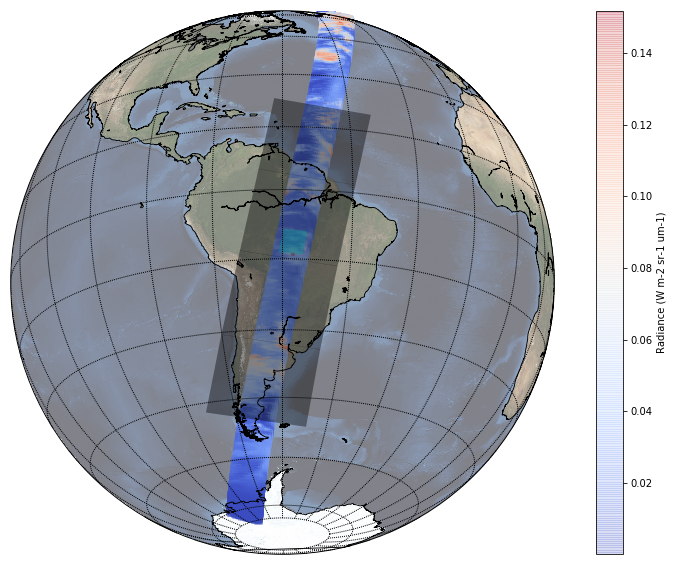

In [21]:
rad, lat, lon = bf.get_rad_latlon(bf_file, 'MOPITT', granule_MOPITT)
rad_avg = rad[:, :, :, 5].ravel()
lat_flat = lat.ravel()
lon_flat = lon.ravel()
idx_valid = np.where(rad_avg > 0)[0]
rad_valid = rad_avg[idx_valid]
lat_valid = lat_flat[idx_valid]
lon_valid = lon_flat[idx_valid]

plt.figure(figsize=(15, 10))
m = Basemap(projection='ortho',lon_0=-60,lat_0=-20,resolution='l')
m.drawcoastlines(color='k', linewidth=0.9)
m.drawmeridians(np.arange(-180.,181,15.))
m.drawparallels(np.arange(90.,-81,-15.))
m.bluemarble(alpha=0.5)
im = m.scatter(lon_valid[:],lat_valid[:],c=rad_valid[:],latlon=True,marker='s',s=55, 
                cmap='coolwarm', alpha=0.2)
plt.colorbar(im, orientation='vertical', label='Radiance (W m-2 sr-1 um-1)')


lats, lons = bf.get_bounding_latlon(bf_file, 'ASTER', granule_ASTER)
draw_screen_poly( lats, lons, m, 'brown' )

lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_0)
draw_screen_poly( lats, lons, m, 'cyan' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_1)
draw_screen_poly( lats, lons, m, 'cyan' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_2)
draw_screen_poly( lats, lons, m, 'cyan' )
lats, lons = bf.get_bounding_latlon(bf_file, 'MISR', block_MISR_3)
draw_screen_poly( lats, lons, m, 'cyan' ) 

lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_1)
draw_screen_poly( lats, lons, m, 'black' )
lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_2)
draw_screen_poly( lats, lons, m, 'black' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_3)
draw_screen_poly( lats, lons, m, 'black' ) 
lats, lons = bf.get_bounding_latlon(bf_file, 'MODIS', granule_MODIS_4)
draw_screen_poly( lats, lons, m, 'black' ) 

plt.show()

### RGB

In [22]:
granule_ASTER = 'granule_08192000142945'
granule_MODIS = 'granule_2000232_1425'
block_MISR = [98]
camera_MISR = 'AN'
granule_MOPITT = 'granule_20100503'
band_MOPITT = 5

__MODIS__

>> Retrieving USER-DEFINED MODIS RGB, granule: granule_2000232_1425.
>> Red: band 1, Green: band 4, Blue: band 3


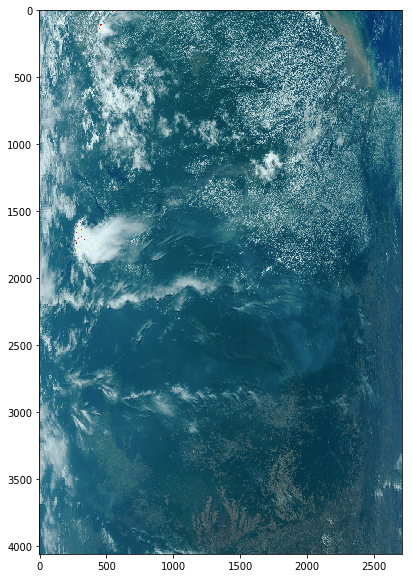

In [25]:
MODIS_rgb = bf.get_rgb(bf_file, 'MODIS', granule_MODIS, customize_rgb_bands=[1, 4, 3])
MODIS_enhanced_rgb = enhance_rgb(MODIS_rgb)

plt.figure(figsize=(15, 10))
plt.imshow(MODIS_enhanced_rgb)
plt.show()